In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#Carguemos ahora nuestro dataset, de la librería de sklearn:
from sklearn.datasets import load_breast_cancer

In [78]:
df = load_breast_cancer()

In [79]:
print(df['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [80]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [81]:
df_cancer = pd.DataFrame(data = df['data'], columns = df['feature_names'])
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [82]:
df_cancer['target'] = df['target']

In [83]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [84]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [85]:
df_cancer.rename(columns = {'target':'cancer'},inplace = True)

In [87]:
#Ahora, empecemos el proceso de entrenamiento
from sklearn.model_selection import train_test_split

In [89]:
X = df_cancer.drop(columns = ['cancer'])
y = df_cancer['cancer']

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [91]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: cancer
Non-Null Count  Dtype
--------------  -----
569 non-null    int32
dtypes: int32(1)
memory usage: 2.3 KB


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [93]:
#Ahora, entrenemos el modelo:
from sklearn.svm import SVC

In [94]:
model = SVC()

In [95]:
model.fit(X_train, y_train)

SVC()

In [97]:
#Empecemos a hacer algunas predicciones con el modelo y a juzgar el modelo
pred_test = model.predict(X_test)

pred_train = model.predict(X_train)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [100]:
cm = confusion_matrix(y_train, pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

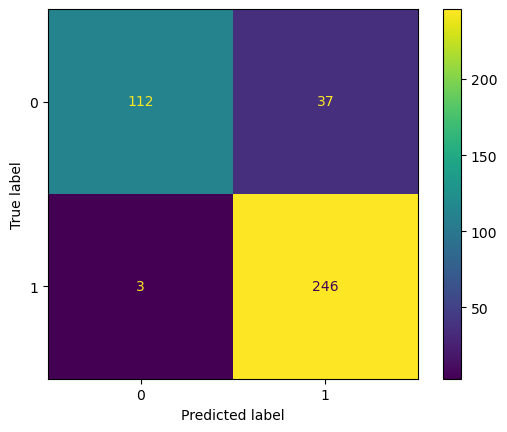

In [101]:
disp.plot()

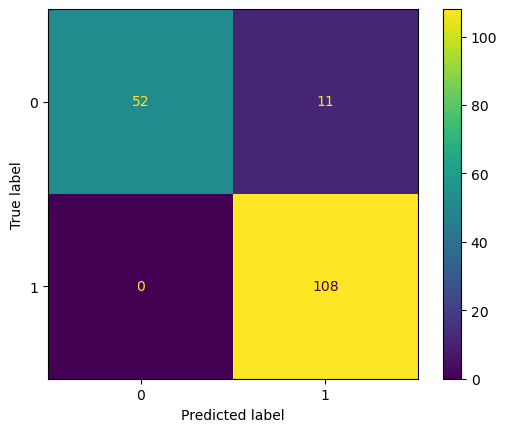

In [103]:
cm2 = confusion_matrix(y_test, pred_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()

In [105]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [106]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       149
           1       0.87      0.99      0.92       249

    accuracy                           0.90       398
   macro avg       0.92      0.87      0.89       398
weighted avg       0.91      0.90      0.90       398



In [112]:
#Ahora pasemos a la parte de la optimización de los hiperparámetros:
dic_param = {'kernel':['linear','sigmoid', 'rbf'], 'C':[100,1,0.1]}

In [109]:
from sklearn.model_selection import GridSearchCV #Este módulo permite probar distintas configuraciones

In [114]:
grid = GridSearchCV(SVC(), dic_param, refit = True, verbose = 3)

In [115]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............C=100, kernel=linear;, score=0.963 total time=   2.6s
[CV 2/5] END ..............C=100, kernel=linear;, score=0.963 total time=   2.5s
[CV 3/5] END ..............C=100, kernel=linear;, score=0.975 total time=   1.1s
[CV 4/5] END ..............C=100, kernel=linear;, score=0.975 total time=   1.7s
[CV 5/5] END ..............C=100, kernel=linear;, score=0.899 total time=   4.5s
[CV 1/5] END .............C=100, kernel=sigmoid;, score=0.900 total time=   0.0s
[CV 2/5] END .............C=100, kernel=sigmoid;, score=0.875 total time=   0.0s
[CV 3/5] END .............C=100, kernel=sigmoid;, score=0.887 total time=   0.0s
[CV 4/5] END .............C=100, kernel=sigmoid;, score=0.886 total time=   0.0s
[CV 5/5] END .............C=100, kernel=sigmoid;, score=0.380 total time=   0.0s
[CV 1/5] END .................C=100, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END .................C=100, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100, 1, 0.1],
                         'kernel': ['linear', 'sigmoid', 'rbf']},
             verbose=3)

In [116]:
grid.best_params_

{'C': 100, 'kernel': 'linear'}

In [117]:
grid.best_score_

0.9546835443037974

In [118]:
grid_pred = grid.predict(X_test)

In [121]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.96      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



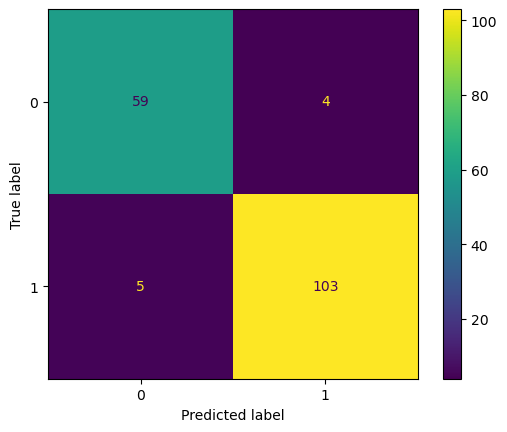

In [122]:
cm3 = confusion_matrix(y_test, grid_pred)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()

In [120]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171

